In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from os.path import join as opj
from scipy.io import loadmat
import pickle

In [3]:
data_dir = "../data"
plot_dir = "../plots"

In [5]:
demo_data = pd.read_csv(opj(data_dir, "abide_I_II_demo_clean.csv"))
cons_res=loadmat('../data/results_clustering_both.mat', 
                            struct_as_record=False, 
                            squeeze_me=True)['res_cluster_pearson']

In [6]:
f = open(opj(data_dir, "subjects_subgroups.pkl"), "rb")
subjects_subgroups = pickle.load(f, encoding='utf-8')
f.close()

asd_subjects = subjects_subgroups['asd_subjs']
tc_subjects = subjects_subgroups['tc_subjs']

subjects = np.concatenate((tc_subjects, asd_subjects))

In [7]:
len(subjects)

1890

In [8]:
len(asd_subjects)

880

In [9]:
S = cons_res.S.flatten()
#clus_subj = cons_res['clus_subj'][0]
cons_mat = cons_res.C

In [10]:
clus_idxs = [np.where(S==ii)[0] for ii in np.unique(S)]
clus_subj = [asd_subjects[idxs] for idxs in clus_idxs]

In [11]:
n_1, n_2, n_3 = len(clus_idxs[0]), len(clus_idxs[1]), len(clus_idxs[2])

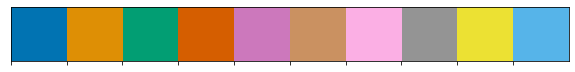

In [13]:
current_palette=sns.color_palette('colorblind')
sns.palplot(sns.color_palette('colorblind'))

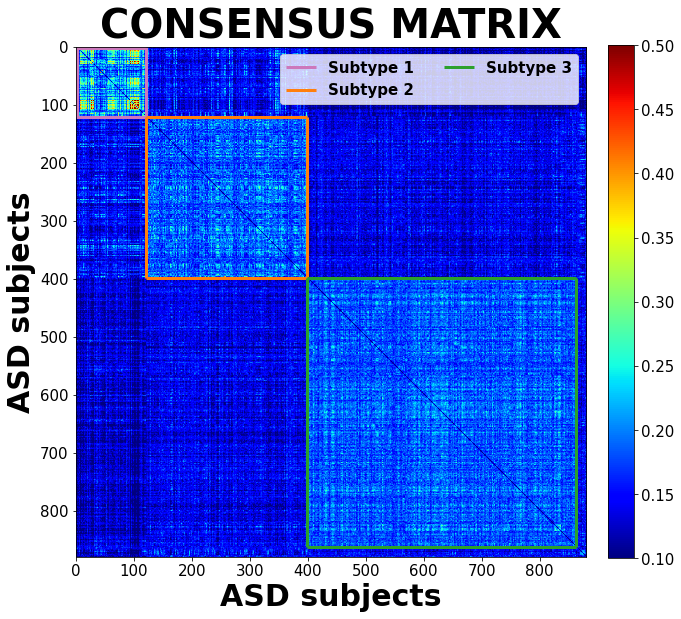

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
im= ax.imshow(cons_mat[np.concatenate(clus_idxs), :][:,np.concatenate(clus_idxs)], 
              cmap = plt.cm.jet, vmin=0.1, vmax=0.5)
ax.set_title("CONSENSUS MATRIX", {"fontsize":40, "fontweight":"bold"})
ax.set_xlabel("ASD subjects", {"fontsize": 30, "fontweight":"bold"})
ax.set_ylabel("ASD subjects", {"fontsize": 30, "fontweight":"bold"})
cbar=plt.colorbar(im,fraction=0.046, pad=0.04)

x0, xf = 0, n_1
y0, yf = 0, n_1

plt.vlines(x=x0 + 1, ymin =y0, ymax = yf , color=current_palette[4], linewidth=3)
plt.vlines(x=xf, ymin =y0, ymax = yf - 1, color=current_palette[4],  linewidth=3)

plt.hlines(y=y0 + 1, xmin =x0, xmax = xf-1, color=current_palette[4],  linewidth=3)
plt.hlines(y=yf, xmin =x0, xmax = xf-1, color=current_palette[4],  linewidth=3, label="Subtype 1")


x0 = xf
xf += n_2
y0 = yf
yf += n_2

plt.vlines(x=x0, ymin =y0, ymax = yf , color=sns.color_palette()[1],  linewidth=3)
plt.vlines(x=xf, ymin =y0, ymax = yf - 1, color=sns.color_palette()[1], linewidth=3)
plt.hlines(y=y0, xmin =x0, xmax = xf-1, color=sns.color_palette()[1], linewidth=3)
plt.hlines(y=yf, xmin =x0, xmax = xf-1, color=sns.color_palette()[1], linewidth=3,  label="Subtype 2")

x0 = xf
xf += n_3
y0 = yf
yf += n_3

plt.vlines(x=x0, ymin =y0, ymax = yf , color=sns.color_palette()[2],  linewidth=3)
plt.vlines(x=xf, ymin =y0, ymax = yf - 1, color=sns.color_palette()[2],  linewidth=3)
plt.hlines(y=y0, xmin =x0, xmax = xf-1, color=sns.color_palette()[2],  linewidth=3)
plt.hlines(y=yf, xmin =x0, xmax = xf-1, color=sns.color_palette()[2],  linewidth=3,  label="Subtype 3")

x0 = xf
xf += len(clus_idxs[3])
y0 = yf
yf += len(clus_idxs[3])
plt.legend(ncol=2, prop={'size':15, 'weight':'bold'})
ax.tick_params(labelsize=15)
cbar.ax.tick_params(labelsize=15) 
plt.savefig(opj(plot_dir, "consensus_mat.png"), dpi=600)
plt.savefig(opj(plot_dir, "consensus_mat.svg"), dpi=600)

## Explore the behaviour

In [16]:
common_pheno_abide = pd.read_csv(opj(data_dir, "common_pheno_abide.csv"))

In [17]:
common_pheno_abide = common_pheno_abide.replace(to_replace = -9999.0, value=np.nan)

In [18]:
common_pheno_abide.HANDEDNESS_CATEGORY = common_pheno_abide.HANDEDNESS_CATEGORY.replace(to_replace = ["1.0", "2.0", "3.0"], 
                                                                                        value = ["R", "L", "Ambi"])

In [44]:
pd.DataFrame({"participant_id":pd.merge(pd.DataFrame({'SUB_ID':subjects}), demo_clean , on = 'SUB_ID').SUB_ID}).sort_values(by="participant_id").to_csv("../data/study_subjects_id.txt", 
                                                                                                                       index=False)

In [42]:
demo_clean = pd.read_csv(opj(data_dir, "abide_I_II_demo_clean.csv"))

In [43]:
demo_clean

,Unnamed: 0,SITE_ID,SUB_ID,DX_GROUP,SEX,AGE_AT_SCAN,DSM_IV_TR,FIQ,VIQ,PIQ,ADI_R_SOCIAL_TOTAL_A,ADI_R_VERBAL_TOTAL_BV,ABIDE_ID
0,0,CALTECH,51456,1,1,55.4000,4.0,126.0,118.0,128.0,NaN,NaN,1
1,1,CALTECH,51457,1,1,22.9000,4.0,107.0,119.0,93.0,23.0,17.0,1
2,2,CALTECH,51458,1,1,39.2000,1.0,93.0,80.0,108.0,13.0,18.0,1
3,3,CALTECH,51459,1,1,22.8000,1.0,106.0,94.0,118.0,12.0,12.0,1
4,4,CALTECH,51460,1,2,34.6000,1.0,133.0,135.0,122.0,21.0,11.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,1039,USM,29523,2,1,36.1451,0.0,115.0,119.0,118.0,NaN,NaN,2
2152,1040,USM,29524,2,1,11.7892,0.0,99.0,99.0,99.0,NaN,NaN,2
2153,1041,USM,29525,2,1,23.2909,0.0,123.0,107.0,117.0,NaN,NaN,2
2154,1042,USM,29526,2,1,32.6242,0.0,86.0,84.0,84.0,NaN,NaN,2


In [15]:
# Rewrite site
demo_clean = pd.read_csv(opj(data_dir, "abide_I_II_demo_clean.csv"))
common_pheno_abide.SITE_ID = pd.merge(common_pheno_abide, demo_clean, on="SUB_ID")['SITE_ID_y']

In [20]:
# Beware, first subjects on the merge to preserve this order
demo_w_clusters = pd.merge(pd.DataFrame({'SUB_ID':subjects}), common_pheno_abide , on = 'SUB_ID')

In [21]:
demo_w_clusters.head()

,SUB_ID,SITE_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,VINELAND_PLAY_V_SCALED,VINELAND_COPING_V_SCALED,VINELAND_SOCIAL_STANDARD,VINELAND_SUM_SCORES,VINELAND_ABC_STANDARD,VINELAND_INFORMANT,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,ABIDE_ID
0,51475,CALTECH,2,0.0,44.2,1,R,NaN,104.0,113.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,I
1,51476,CALTECH,2,0.0,39.3,1,R,NaN,123.0,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,I
2,51477,CALTECH,2,0.0,42.5,1,R,NaN,97.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,I
3,51478,CALTECH,2,0.0,19.7,1,R,NaN,116.0,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,I
4,51479,CALTECH,2,0.0,20.0,2,R,NaN,111.0,110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,I


Add cluster ID column

In [22]:
demo_w_clusters['clus_id'] = pd.NA

demo_w_clusters.loc[demo_w_clusters.SUB_ID.isin(tc_subjects), 'clus_id'] = 0

for ii, sub_clus in enumerate(clus_subj):
    demo_w_clusters.loc[demo_w_clusters.SUB_ID.isin(sub_clus), 'clus_id'] = ii+1

In [23]:
demo_w_clusters.clus_id.value_counts()

0    1010
3     464
2     278
1     121
5      10
4       4
7       2
6       1
Name: clus_id, dtype: int64

In [45]:
?

Object `fisher_exact` not found.


In [25]:
from scipy.stats import chi2_contingency, fisher_exact
fisher_exact(pd.crosstab(demo_w_clusters.SEX, 
                         demo_w_clusters.DX_GROUP).values)

(1.8991848991848992, 1.288911987574412e-07)

In [24]:
# Save this to disk for further use
demo_w_clusters.to_excel(opj('../data','pheno_w_clusters.xlsx'), index=False)

In [25]:
from scipy.stats import chi2_contingency, kruskal, f_oneway, shapiro

In [196]:
colors = [current_palette[4], current_palette[1], current_palette[2]]

In [37]:
demo_w_clusters.columns
iq_scores = ['FIQ', 'VIQ', 'PIQ']
adi_scores = ['ADI_R_SOCIAL_TOTAL_A', 'ADI_R_VERBAL_TOTAL_BV', 'ADI_RRB_TOTAL_C',
              'ADI_R_ONSET_TOTAL_D']
src_scores = ['SRS_RAW_TOTAL', 'SRS_AWARENESS', 'SRS_COGNITION', 'SRS_COMMUNICATION',
              'SRS_MOTIVATION', 'SRS_MANNERISMS']

ados_scores = ['ADOS_TOTAL', 'ADOS_COMM', 'ADOS_SOCIAL', 'ADOS_STEREO_BEHAV',
               'ADOS_GOTHAM_SOCAFFECT', 'ADOS_GOTHAM_RRB',
               'ADOS_GOTHAM_TOTAL', 'ADOS_GOTHAM_SEVERITY']

In [53]:
kruskal(demo_w_clusters[demo_w_clusters.clus_id==0]['SRS_RAW_TOTAL'].dropna().values,
         demo_w_clusters[demo_w_clusters.clus_id==2]['SRS_RAW_TOTAL'].dropna().values)

KruskalResult(statistic=351.2565997522966, pvalue=2.2568286638276164e-78)

In [39]:
beh_scores = ['FIQ', 'VIQ', 'PIQ', 
              'ADI_R_SOCIAL_TOTAL_A', 'ADI_R_VERBAL_TOTAL_BV', 'ADI_RRB_TOTAL_C',
              'ADI_R_ONSET_TOTAL_D', 'ADI_R_RSRCH_RELIABLE',
              'ADOS_TOTAL', 'ADOS_COMM', 'ADOS_SOCIAL', 'ADOS_STEREO_BEHAV',
              'ADOS_RSRCH_RELIABLE', 'ADOS_GOTHAM_SOCAFFECT', 'ADOS_GOTHAM_RRB',
              'ADOS_GOTHAM_TOTAL', 'ADOS_GOTHAM_SEVERITY']


cond = (demo_w_clusters.clus_id == 1) | (demo_w_clusters.clus_id == 2) | (demo_w_clusters.clus_id == 3)
beh_table = []
for var in beh_scores:
    
    row = [np.round(demo_w_clusters.loc[demo_w_clusters.clus_id==clus_id, var].mean(), 2) for 
             clus_id in [1,2,3]]
    
    f, p = f_oneway(*[demo_w_clusters.loc[demo_w_clusters.clus_id==clus_id, var].dropna() for 
                         clus_id in [1,2,3]])
    
    row = row + [np.round(p, 2)]
    beh_table.append(row)
    print(var, "=", p)
beh_table = pd.DataFrame(beh_table)
beh_table.index = beh_scores
beh_table.columns = ['cluster 1', 'cluster 2', 'cluster 3', 'p-value']
beh_table.head()

FIQ = 0.2690310986517191
VIQ = 0.11594125932490283
PIQ = 0.6178942856255853
ADI_R_SOCIAL_TOTAL_A = 0.10455101651930326
ADI_R_VERBAL_TOTAL_BV = 0.2271376582534797
ADI_RRB_TOTAL_C = 0.39695666192416434
ADI_R_ONSET_TOTAL_D = 0.8991228890230961
ADI_R_RSRCH_RELIABLE = 0.49452225471368993
ADOS_TOTAL = 0.5214093237235271
ADOS_COMM = 0.47595498936842007
ADOS_SOCIAL = 0.21136863822457447
ADOS_STEREO_BEHAV = 0.2245187196575879
ADOS_RSRCH_RELIABLE = 0.5311894028752221
ADOS_GOTHAM_SOCAFFECT = 0.5219484582468507
ADOS_GOTHAM_RRB = 0.18875076707802418
ADOS_GOTHAM_TOTAL = 0.3867453921979065
ADOS_GOTHAM_SEVERITY = 0.35769102674125924


,cluster 1,cluster 2,cluster 3,p-value
FIQ,104.10,106.98,106.54,0.27
VIQ,102.68,106.26,106.87,0.12
PIQ,104.37,106.29,105.94,0.62
ADI_R_SOCIAL_TOTAL_A,18.08,19.46,19.45,0.10
ADI_R_VERBAL_TOTAL_BV,16.18,15.22,15.27,0.23


In [27]:
from statsmodels.stats.multitest import multipletests
multipletests(beh_table.iloc[:,3].values, method="fdr_bh")

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False]),
 array([0.459   , 0.459   , 0.563125, 0.459   , 0.459   , 0.459   ,
        0.93    , 0.563125, 0.563125, 0.563125, 0.459   , 0.459   ,
        0.563125, 0.563125, 0.459   , 0.459   , 0.459   ]),
 0.0030127052790058784,
 0.0029411764705882353)

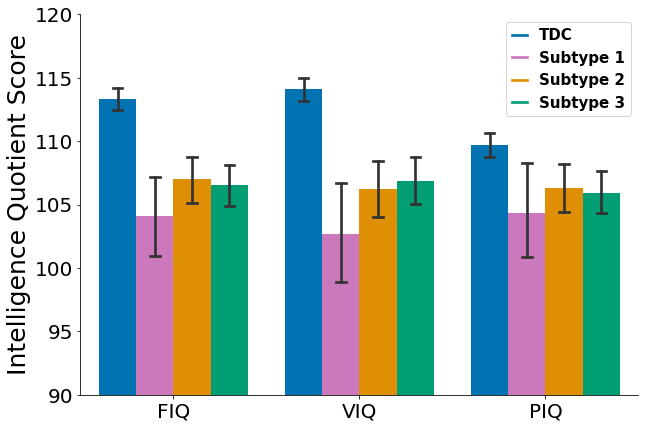

In [30]:
iq_vars = ['FIQ', 'VIQ', 'PIQ']

fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(hue='clus_id', y='value',x='variable', 
            data = pd.melt(demo_w_clusters[demo_w_clusters.clus_id<4], 
                           id_vars=['clus_id'], 
                           value_vars=iq_vars), 
            capsize=0.05, 
            ax=ax, 
            errcolor='.2', 
            palette=[current_palette[0], current_palette[4], 
                     current_palette[1], current_palette[2]],
            saturation=1,
            n_boot=1000,
            seed=0
           )

plt.ylim([90, 120])
ax.tick_params(labelsize=20)
ax.set_xlabel("")
ax.set_ylabel("Intelligence Quotient Score", size=25)
ax.legend(['TDC', 'Subtype 1', 'Subtype 2', 'Subtype 3'], 
          fontsize=15, prop={'size':15,'weight':'bold'}, handlelength=1)
sns.despine()
ax.get_legend().legendHandles[0].set_color(current_palette[0])
ax.get_legend().legendHandles[1].set_color(current_palette[4])
ax.get_legend().legendHandles[2].set_color(current_palette[1])
ax.get_legend().legendHandles[3].set_color(current_palette[2])
plt.savefig('../plots/fig_s_iq.svg', dpi=600)
plt.savefig('../plots/fig_s_iq.png', dpi=600)

In [31]:
print(beh_table.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  cluster 1 &  cluster 2 &  cluster 3 &  p-value \\
\midrule
FIQ                   &     104.10 &     106.98 &     106.54 &     0.27 \\
VIQ                   &     102.68 &     106.26 &     106.87 &     0.12 \\
PIQ                   &     104.37 &     106.29 &     105.94 &     0.62 \\
ADI\_R\_SOCIAL\_TOTAL\_A  &      18.08 &      19.46 &      19.45 &     0.10 \\
ADI\_R\_VERBAL\_TOTAL\_BV &      16.18 &      15.22 &      15.27 &     0.23 \\
ADI\_RRB\_TOTAL\_C       &       6.13 &       5.82 &       5.72 &     0.40 \\
ADI\_R\_ONSET\_TOTAL\_D   &       3.15 &       3.12 &       3.08 &     0.90 \\
ADI\_R\_RSRCH\_RELIABLE  &       0.92 &       0.90 &       0.88 &     0.49 \\
ADOS\_TOTAL            &      12.00 &      11.35 &      11.52 &     0.52 \\
ADOS\_COMM             &       3.65 &       3.55 &       3.73 &     0.48 \\
ADOS\_SOCIAL           &       8.35 &       7.70 &       7.71 &     0.21 \\
ADOS\_STEREO\_BEHAV     &       2.31 &       1.91 &      

In [28]:
from scipy.stats import f_oneway

In [37]:
f, p = f_oneway(*[demo_w_clusters.loc[demo_w_clusters.clus_id==clus_id, 'AGE_AT_SCAN'].dropna() for 
                     clus_id in [1,2,3]])

In [40]:
print("Age across clusters F=%.3f, p=%.3f" %(f, p))

Age across clusters F=1.031, p=0.358
